# Project notebook


In this notebook you can see how to access all the information connected to an existing project in CKG database.
The steps to generate an analytical report for a project are:

1) Create a Project object with the project identifier

2) Build the project by gathering and processing all the data in the project

3) Generate statistical report

4) Visualize report

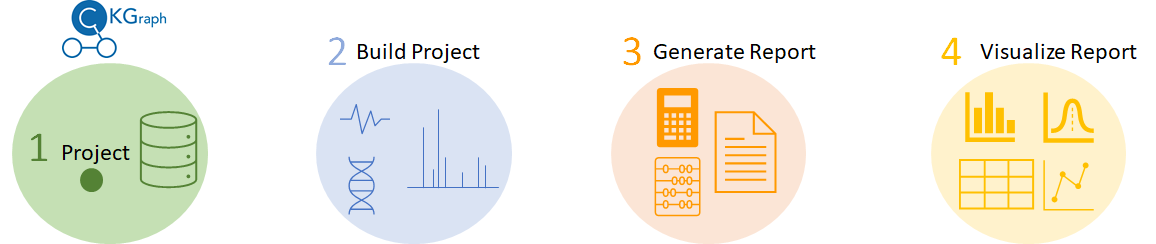

After these steps, all visualizations and statistical results defined in the configuration files will be available for further exploration or analysis. For instance:

- Original dataframe
- Processed dataframe
- Differential regulation results
- Correlation matrix
- Associations to Diseases, Drugs, Pathways, etc.

This recipe notebook shows also how to access these dataframes.

## Library import

In [1]:
from ckg.report_manager import project

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline

c:\users\sande\.conda\envs\pip_rev\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



WGCNA functions will not work. Module Rpy2 not installed.
R functions will not work. Module Rpy2 not installed.


## 1 Creating a Project object

This creates a project object with the identifier of an existing project. When default parameters are used, CKG will obtain all the data from the database when building the project. 

If no specific configuration files are provided for any of the data types, CKG will run the default analytical pipeline define for each one of them. When a different analysis is necessary, the path to the specific configuration file needs to be provided in the `configuration_files` dictionary. For instance:

``` python
p = project.Project(identifier='P0000001', configuration_files={'proteomics': 'path_to_my_customized_pipeline_configuration_file'}, datasets={}, knowledge=None, report={})
```

In [2]:
p = project.Project(identifier='P0000001', configuration_files={}, datasets={}, knowledge=None, report={})

## 2 Build Project

Obtains all the data available for the project and processes each data type to get them ready for analysis.

The function `build_project` takes one argument *force*, if set to `False`, CKG will try to find an existing report in 'data/reports' and if the report was previously generated, it won't force building the project again. When *force* is set to `True` the project is built even if a previous report was generated.

In [3]:
p.build_project(force=False)

## 3 Generate Project Report

In [4]:
p.generate_report()

## 4 Visualizing the Project report

This code will show all the plots generated in the analysis. The function `show_report` takes an argument *environment* (string), which can take 2 values:

- app: used in the Dashboard
- notebook: to visualize the plots in a jupyter notebook



In [5]:
plots = p.show_report(environment="notebook")

### Note: 
#### The result of the previous command is a dictionary where the keys correspond to the different tabs in the app ("Project information", "Clinical", "Proteomics", "Multiomics" and "Knowledge graph")

In [6]:
plots.keys()

dict_keys(['PROJECT INFORMATION', 'CLINICAL', 'PROTEOMICS', 'MULTIOMICS', 'KNOWLEDGE GRAPH'])

In [7]:
plots['PROTEOMICS'][0]

Cytoscape(data={'elements': [{'data': {'degree': 12, 'radius': 12, 'color': '#1acf66', 'cluster': 0, 'id': 'AP…

In [8]:
plots['PROTEOMICS'][1]

Cytoscape(data={'elements': [{'data': {'degree': 14, 'radius': 14, 'color': '#1acf66', 'cluster': 0, 'id': 'A1…

## Access to datasets

### Clinical data

In [9]:
clin_dataset = p.get_dataset('clinical').get_dataframe('processed')
clin_dataset.head()

White blood cell count  Days on vasopressors  Eosinophil count  \
0                     0.0                   0.0               0.0   
1                     0.0                   0.0               0.0   
2                     0.0                   0.0               0.0   
3                     0.0                   0.0               0.0   
4                     0.0                   0.0               0.0   

   Days of hospital stay  Plasma bicarbonate measurement (procedure)  \
0                      0                                         0.0   
1                      0                                         0.0   
2                      0                                         0.0   
3                      0                                         0.0   
4                      0                                         0.0   

   C-reactive protein measurement  Alkaline phosphatase level  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   

   Plasma lactate level (procedure)  Monocyte count  Days symptom to sample  \
0                               0.0             0.0                    23.0   
1                               0.0             0.0                    57.0   
2                               0.0             0.0                    33.0   
3                               0.0             0.0                    39.0   
4                               0.0             0.0                    14.0   

   ...  Days on ventilation  Neutrophil count  \
0  ...                  0.0               0.0   
1  ...                  0.0               0.0   
2  ...                  0.0               0.0   
3  ...                  0.0               0.0   
4  ...                  0.0               0.0   

   Days on renal replacement therapy  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   

   Hemoglobin concentration, dipstick - finding  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Index of Multiple Deprivation (IMD) quintile  OpenSAFELY score  \
0                                           0.0               0.0   
1                                           0.0               0.0   
2                                           0.0               0.0   
3                                           0.0               0.0   
4                                           0.0               0.0   

   Age (qualifier value)           group    biological_sample  subject  
0                     26  COVID-19 (HCW)  G04225-Ja028E-PMCda   G04225  
1                     26  COVID-19 (HCW)  G04225-Ja056E-PMCda   G04225  
2                     22  COVID-19 (HCW)  G05060-Ja028E-PMCda   G05060  
3                     26  COVID-19 (HCW)  G05062-Ja028E-PMCda   G05062  
4                     59  COVID-19 (HCW)  G05064-Ja005E-PMCda   G05064  

[5 rows x 24 columns]

### Proteomics dataset (original)

In [10]:
dataset = p.get_dataset("proteomics").get_dataframe("original")

In [11]:
dataset.head()

subject               sample identifier           group  LFQ_intensity  name
0  G05292  G05292-Ja056E-PMCda     P04217  COVID-19 (HCW)      18.441665  A1BG
1  G05291  G05291-Ja056E-PMCda     P04217  COVID-19 (HCW)      18.489362  A1BG
2  G05290  G05290-Ja056E-PMCda     P04217  COVID-19 (HCW)      18.589654  A1BG
3  G05287  G05287-Ja056E-PMCda     P04217  COVID-19 (HCW)      19.294966  A1BG
4  G05283  G05283-Ja056E-PMCda     P04217  COVID-19 (HCW)      19.812738  A1BG

### Proteomics dataset (processed)
After log transformation, filtering and imputation.

In [12]:
proteomics = p.get_dataset("proteomics").get_dataframe("processed")

In [13]:
proteomics

group               sample subject  A1BG~P04217  A2M~P01023  \
0    COVID-19 (HCW)  G04225-Ja028E-PMCda  G04225    18.632284   20.860098   
1    COVID-19 (HCW)  G04225-Ja056E-PMCda  G04225    18.420233   21.057772   
2    COVID-19 (HCW)  G05060-Ja028E-PMCda  G05060    17.812104   20.627232   
3    COVID-19 (HCW)  G05062-Ja028E-PMCda  G05062    18.536780   21.384817   
4    COVID-19 (HCW)  G05064-Ja005E-PMCda  G05064    18.433179   21.069624   
..              ...                  ...     ...          ...         ...   
348          Sepsis  N00053-Ja001E-PMGaa  N00053    18.895987   22.095888   
349          Sepsis  N00054-Ja003E-PMGaa  N00054    19.223620   21.902523   
350          Sepsis  N00054-Ja005E-PMGaa  N00054    18.934928   21.692493   
351          Sepsis  N00056-Ja001E-PMGaa  N00056    18.888893   21.306907   
352          Sepsis  N00057-Ja001E-PMGaa  N00057    18.997750   21.281976   

     ACTB~P60709  AGT~P01019  AHSG~P02765  ALB~P02768  APCS~P02743  ...  \
0      14.618478   17.248540    18.741633   23.508198    18.576867  ...   
1      14.091948   16.857884    18.629792   24.092875    16.878663  ...   
2      15.416604   16.677075    18.342427   24.253146    16.842185  ...   
3      14.540481   17.389936    19.118585   23.291762    17.444649  ...   
4      14.141777   17.299229    17.821824   23.637020    17.293209  ...   
..           ...         ...          ...         ...          ...  ...   
348    14.597715   19.618978    18.379828   24.187414    16.194610  ...   
349    14.318843   17.716324    18.078790   23.653646    17.047418  ...   
350    13.945758   17.730977    18.321964   23.060519    17.123263  ...   
351    13.491292   17.737982    18.108946   23.193351    16.026571  ...   
352    17.254898   17.778478    16.823802   23.430950    16.474431  ...   

     SERPINA6~P08185  SERPINA7~P05543  SERPINC1~P01008  SERPIND1~P05546  \
0          16.115323        13.869120        19.448380        16.519516   
1          16.569196        14.129668        19.140145        16.258990   
2          15.658959        14.477599        18.631787        16.809163   
3          16.615347        14.880896        19.206505        16.498257   
4          15.763016        14.254252        18.845098        16.264786   
..               ...              ...              ...              ...   
348        16.495927        14.584655        18.711695        17.532017   
349        16.871572        14.345300        19.012055        17.039148   
350        15.355553        13.750869        18.817383        16.544302   
351        16.190776        14.473158        18.782466        15.892855   
352        15.914357        14.560838        18.347492        15.379016   

     SERPINF1~P36955  SERPINF2~P08697  SERPING1~P05155  TF~P02787  TTR~P02766  \
0          16.249543        17.109400        19.071008  21.642267   20.023937   
1          14.912405        17.157660        18.692651  21.784518   19.466429   
2          15.535937        17.301372        18.278338  21.794720   19.508010   
3          16.183700        16.993072        18.927735  21.634934   19.454878   
4          14.905168        17.317149        18.468138  21.247520   19.532295   
..               ...              ...              ...        ...         ...   
348        17.091606        17.931380        20.748268  20.181653   17.470321   
349        16.271866        17.420793        19.774567  21.444553   17.812104   
350        16.080135        17.899508        19.630011  21.217241   17.723530   
351        16.788078        17.023634        18.968259  21.408498   18.309182   
352        16.126372        17.424253        19.779537  20.404400   17.066880   

     VTN~P04004  
0     18.929732  
1     18.232780  
2     18.136673  
3     18.660251  
4     18.066104  
..          ...  
348   18.476700  
349   18.567025  
350   18.629492  
351   18.491747  
352   18.480210  

[353 rows x 108 columns]

## Analyses results

#### Differential regulation: result from statistical analysis of the data

In [14]:
reg_table = p.get_dataset("proteomics").get_dataframe("regulation table")
reg_table.head()

identifier          group1               group2  mean(group1)  \
0  A1BG~P04217  COVID-19 (HCW)  COVID-19 (critical)     18.260913   
1  A1BG~P04217  COVID-19 (HCW)      COVID-19 (mild)     18.260913   
2  A1BG~P04217  COVID-19 (HCW)    COVID-19 (severe)     18.260913   
3  A1BG~P04217  COVID-19 (HCW)              Healthy     18.260913   
4  A1BG~P04217  COVID-19 (HCW)               Sepsis     18.260913   

   std(group1)  mean(group2)  std(group2)  posthoc Paired  posthoc Parametric  \
0     0.383215     18.541013     0.368879           False                True   
1     0.383215     18.479078     0.405678           False                True   
2     0.383215     18.540129     0.494780           False                True   
3     0.383215     18.575200     0.194486           False                True   
4     0.383215     18.647560     0.351069           False                True   

   posthoc T-Statistics  ...        FC efftype  F-statistics        pvalue  \
0             -4.122938  ...  0.823533  hedges      9.635213  1.260000e-08   
1             -2.899453  ...  0.859658  hedges      9.635213  1.260000e-08   
2             -4.290064  ...  0.824039  hedges      9.635213  1.260000e-08   
3             -5.803271  ...  0.804248  hedges      9.635213  1.260000e-08   
4             -6.458620  ...  0.764905  hedges      9.635213  1.260000e-08   

           padj         correction  rejected -log10 pvalue         Method  \
0  1.780000e-08  FDR correction BH      True      3.988424  One-way anova   
1  1.780000e-08  FDR correction BH      True      2.275846  One-way anova   
2  1.780000e-08  FDR correction BH      True      4.483368  One-way anova   
3  1.780000e-08  FDR correction BH      True      6.503691  One-way anova   
4  1.780000e-08  FDR correction BH      True      8.472540  One-way anova   

   posthoc padj  
0  1.739296e-04  
1  9.760426e-03  
2  5.655770e-05  
3  9.977000e-07  
4  7.900000e-09  

[5 rows x 26 columns]